In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [38]:
def get_neighbours(index, data, epsilon, matrix):
    row = matrix[index]
    n = np.where(row <= epsilon)[0]
    return list(set(n))

def dbscan(data, epsilon, minpts, matrix):
    cluster_num = 0
    for j in data.index.values.tolist():
        row = data.loc[j]
        
        if not pd.isna(row.cluster):
            continue
        
#         neighbours = list(set([int(x.strip()) for x in row.neighbors.split(',')]))
        neighbours = get_neighbours(j, data, epsilon, matrix)

        if len(neighbours) < minpts:
            data.loc[j, 'cluster'] = -1  # noise
            continue

        cluster_num += 1
        data.loc[j, 'cluster'] = cluster_num
        
        nn = list(set(neighbours) - set([j]))
        
        for i in nn:
            r = data.loc[i]
                
            if r.cluster == -1:
                data.loc[i, 'cluster'] = cluster_num
                continue
                
            if not pd.isna(r.cluster):
                continue
            
            data.loc[i, 'cluster'] = cluster_num
            
            new_neighbours = get_neighbours(i, data, epsilon, matrix)
            if len(new_neighbours) >= minpts:
                nn.extend(new_neighbours)

def plot(df):
    clusters = set(df.cluster.tolist())
    for c in clusters:
        tmp = df[df['cluster'] == c]
        plt.plot(tmp.x, tmp.y, 'o')

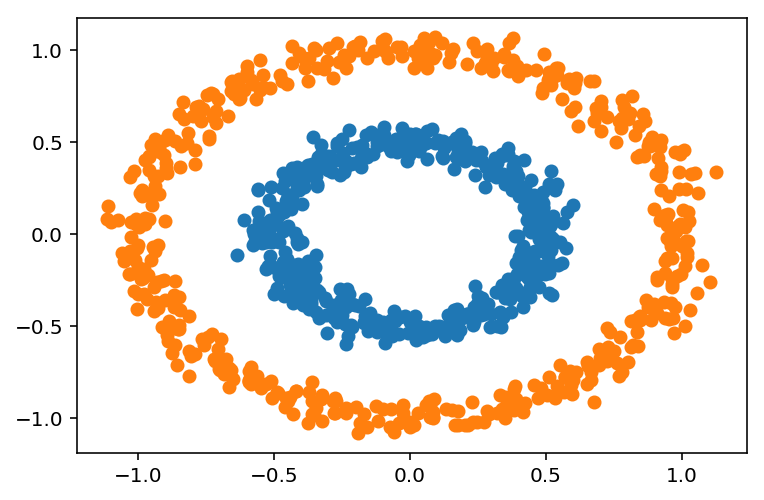

In [41]:
circles = pd.read_csv('../Data/circle.csv', names=['x', 'y'], skiprows=1)
circle_matrix = euclidean_distances(circles)
circles['cluster'] = np.nan

dbscan(circles, 0.1, 4, circle_matrix)
plot(circles)

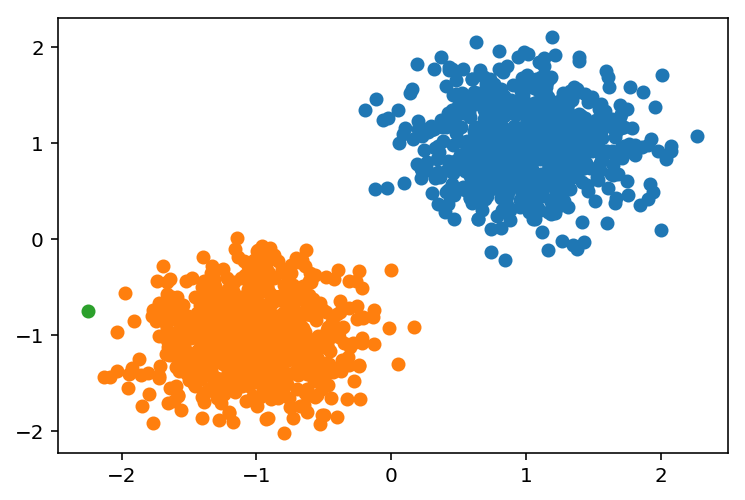

In [48]:
blobs = pd.read_csv('../Data/blobs.csv', names=['x', 'y'], skiprows=1)
blob_matrix = euclidean_distances(blobs)
blobs['cluster'] = np.nan

dbscan(blobs, 0.3, 4, blob_matrix)
plot(blobs)

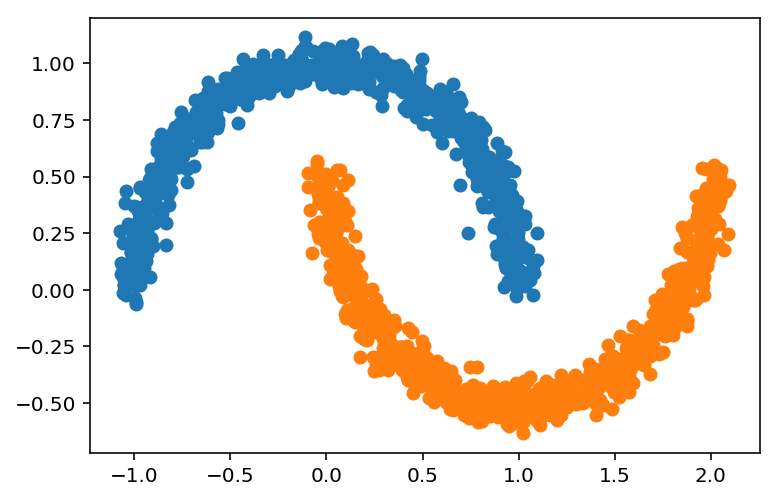

In [47]:
moons = pd.read_csv('../Data/moons.csv', names=['x', 'y'], skiprows=1)
moon_matrix = euclidean_distances(moons)
moons['cluster'] = np.nan

dbscan(moons, 0.3, 4, moon_matrix)
plot(moons)